# <center>Tarea 5<center>
## <center>Matrices Aleatorias<center>

## Ejercicio 1

Dibuje la frontera óptima para el proceso verdadero, dentro de muestra, y fuera de muestra para el caso $p=100, n=200$. Para esto asuma lo siguiente:

   1.- Considere un retorno esperado del 100% en los tres casos, i.e., $\mu=(1,\dots, 1)^T$
   
   2.- Suponga $\Sigma = I$

   3.- Modele la matriz de covarianza muestral S como una matriz aleatoria del ensemble de Wishart con $\sigma = 0.2$
   

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import math as mt
import yfinance as yf 
#pip install yfinance
import scipy as scipy
from scipy import integrate

In [4]:
#mu = np.ones(p)

def frontera(valor_n,valor_p,sig,cambia):
    n = valor_n
    p = valor_p
    
    if cambia == 0:
        mu= np.ones(p)
    elif cambia == 1:
        mu=np.random.uniform(.3,.8,p)
        
    #mu = np.ones(p) #nuestros retornos esperados
    Sigma = np.diag(mu)    #nuestra matriz de covarianza

    #S = np.random.normal(0,0.2,(n,n))
    X = np.random.normal(0,1,(p,n))
    D = np.diag(np.repeat(sig,n))
    Z = np.dot(X,D)
    S = np.corrcoef(Z)

    G = np.linspace(1, 92, num=100) # Los retornos

    # Ahora calculamos el riesgo verdadero
    risk_true = (G**2)/(np.dot(mu.T,mu))


    #Calculamos el Risk_in
    S_inv=np.linalg.inv(S)
    risk_in=(G**2)/(mu.T@S_inv@mu)

    #Calculamos el riesgo Risk_out
    risk_out=(G**2)*(mu.T@S_inv@Sigma@S_inv@mu)/((mu.T@S_inv@mu)**2)
    

    plt.plot(risk_true,G,"blue", label="Risk True")
    plt.plot(risk_in,G,"orange", label="Risk In")
    plt.plot(risk_out,G, "green",label="Risk Out")
    plt.legend()

Una vez que ya se ha programado la frontera de decisión, grafiquemos para el caso $n=200,p=100$


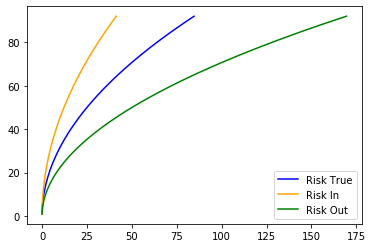

In [5]:
frontera(200,100,0.2,0)

### ¿El comportamiento depende de p, n o de $\frac{p}{n}$ ?

Para responder a esta pregunta, primero cambiemos p y n pero mantengamos el cociente. Si $\frac{p}{n}=\frac{150}{300}$ Entonces el resultado se mantiene.


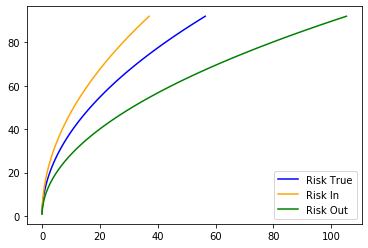

In [6]:
frontera(300,150,0.2,0)

Si $n<p$, como por ejemplo, $\frac{p}{n}=\frac{75}{150}$, entonces el riesgo verdadero y el riesgo in están más cercanos entre sí pero ambos más alejados del risk out (y para este caso, con $\sigma=0.2$ las fronteras ya no son congruentes.


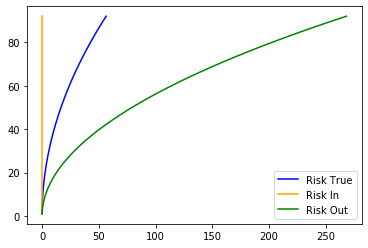

In [7]:
frontera(75,150,0.2,0)

Si $n>p$, como por ejemplo, $\frac{p}{n}=\frac{150}{800}$, entonces las tres fronteras se acercan  se aleja del riesgo verdadero así como del riesgo in.


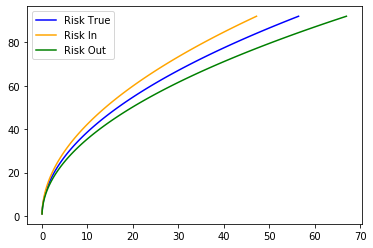

In [8]:
frontera(800,150,0.2,0)

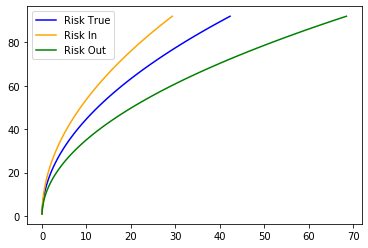

In [9]:
frontera(550,200,0.2,0)

Por ende, las fronteras cambian su comportamiento si cambia el cociente $\frac{p}{n}$

### ¿Cambia el comporatamiento de los resultados al variar el valor de $\sigma$?

Como puede verse en los siguientes gráficos, donde se tomó una $\sigma=0.0002$ y $\sigma=1$, los resultados sí cambian.


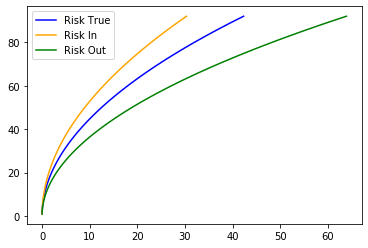

In [10]:
frontera(550,200,0.0002,0)

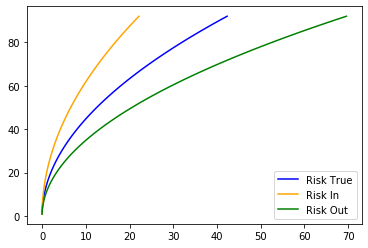

In [11]:
frontera(550,200,1,0)

### ¿Cambia el comportamiento ante otra elección del valor del retorno esperado del portafolio $\mu$?

Sí, si por ejemplo, escogemos el valor del retorno de forma aleatoria (como en el siguiente ejemplo), con cada nuevo "retorno" obtenemos valores diferentes

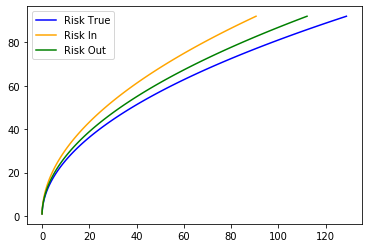

In [12]:
frontera(550,200,1,1)

## Ejercicio 2

   1.- Obtenga una muestra de variables financieras en el contexto de alta dimensionalidad.

   2.- Utilice el método propuesto en "Random matrix theory and financial correlations (L. Laloux, et. al. 2000)" para limpiar la matriz de correlación y mejorar la frontera óptima dentro y fuera de muestra. En específico, implemente el metodología
utilizada para generar la figura 2 que se muestra en el artículo.

   3.- Explique sus resultados.
   
Para comenzar se descargaron de Yahoo Finance mediante la librería para Python "yfinance" los precios de 35 acciones de empresas pertenecientes al índice Standard & Poor's 500 desde el primero de enero del 2014 hasta el primero de enero del 2018. Es decir, se tienen 1035 observaciones de 36 activos.

A continuación, se presenta el código empleado para limpiar y mejorar la frontera óptima dentro y fuera de muestra.

In [4]:
# Descargamos los datos

data = yf.download('MMM ABT ABMD ACN ATVI ADBE AMD AAP AES AMG AFL A APD AKAM ALK ALB ARE ALXN ALGN ALLE AGN ADS LNT ALL GOOGL GOOG MO AMZN AMCR AEE AAL AEP AXP AIG AMT XYL'
                   ,'2014-01-01','2018-01-01')

#data = yf.download('AVGO BR BF.B CHRW COG CDNS CPB COF CPRI CAH KMX CCL CAT CBOE CBRE CBS CE CELG CB CHD ED STZ COO CPRT GLW CTVA COST COTY CCI CSX CMI CVS DHI DHR DRI DVA DE DAL XRAY DVN FANG DLR DFS FFIV'
#                   ,'2014-01-01','2018-01-01') 
at_close = data.Close    #save just the close price #1035 x 33
at_open = data.Open    #save just the open price

#Calculamos los retornos
#Retornos = (at_close-at_open)*100/at_open
at_open.iloc[:-1,:] =np.diff(np.log(at_open.iloc[:,:]), axis =0)
Retornos = at_open

[*********************100%***********************]  36 of 36 downloaded


C:\Users\chiqu\.conda\envs\work_hard\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\chiqu\.conda\envs\work_hard\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [5]:

def frontera_activos(valor_corte):
    #corte = int(Retornos.shape[0]/2)
    #corte = 75 #Definimos el número de obs a tomar
    corte = valor_corte
    mitad_1 = Retornos[:corte] #nos quedamos sólo con una parte de los datos
    mitad_2 = Retornos[corte :corte*2]

    mitad_1t =mitad_1.T #transponemos
    mitad_2t =mitad_2.T

    #######################################
    #CALCULAMOS EL RISK IN SUCIO
    #######################################

    n = mitad_1.shape[0] 
    p = mitad_1.shape[1]
    #print(n,p)

    mu = np.ones(p) #nuestros retornos esperados

    Sigma = np.diag(mu)    #nuestra matriz de covarianza

    S = np.cov(mitad_1t)

    G = np.linspace(1, 100, num=100) # Los retornos

    #Calculamos el Risk_in
    S_inv = np.linalg.inv(S)

    risk_in_dirty=(G**2)/np.dot(np.dot(mu.T,S_inv),mu)

    #plt_risk_In_dirty=plt.plot(risk_in_dirty,G)

    #######################################
    #CALCULAMOS EL RISK OUT SUCIO
    #######################################

    n2 = mitad_2.shape[0] 
    p2 = mitad_2.shape[1]

    mu = Retornos.mean(0) #nuestros retornos esperados

    Sigma_1 = np.cov(mitad_2t)   #nuestra matriz de covarianza de la segunda mitad de los datos

    S = np.cov(mitad_1t)

    G = np.linspace(1, 100, num=100) # Los retornos

    #Calculamos el riesgo Risk_out
    numerador = (G**2)*(np.dot(np.dot(np.dot(np.dot(mu.T,S_inv),Sigma_1),S_inv),mu))

    denominador = (np.dot(np.dot(mu.T,S_inv),mu)**2)

    risk_out_dirty=numerador/denominador

    #plt_risk_In_dirty=plt.plot(risk_in_dirty,G,"orange",label="In dirty")#Graficamos in sucia
    #plt_risk_out_dirty=plt.plot(risk_out_dirty,G,"red",label="Out dirty")
    #plt.legend(loc='lower right')


    #######################################
    #CALCULAMOS EL RISK IN LIMPIO
    #######################################

    Q = p/n 
    l_max = (1+mt.sqrt(Q))**2 #Calculamos el lambda máximo
    l_min = (1-mt.sqrt(Q))**2 #El lambda mínimo

    #print("El valor máximo de lambda: ",l_max,"\n") 

    eigval, eigvec = np.linalg.eig(S) #Sacamos los eigenvalores

    num_eigval = eigval.shape[0] #Número total de eigenvalores
    num_eig_mlam = eigval[eigval>l_max].shape[0] #Número de eigenval mayores a l_max

    #print("Eigenvalores mayores: ,",num_eig_mlam, "totales,",num_eigval,"\n")

    unos = np.ones(num_eigval-num_eig_mlam) #reemplazo para eigenval menores a cota superior

    cte = np.mean(eigval[num_eig_mlam:]) #Versión that works
    #cte =sum(eigval[num_eig_mlam:])/eigval[num_eig_mlam:].shape[0]

    eigval_clean = np.copy(eigval)
    eigval_clean[num_eig_mlam:] = unos*cte #nuestros eigenvalores limpios

    S_tilde = np.dot(np.dot(eigvec,np.diag(eigval_clean)),eigvec.T) #La S reconstruida con los eigenval limpios

    #print("Suma eigenvalores limpios: ",sum(eigval_clean),"Suma eigenval",sum(eigval)) 
    #print("\nTraza S tilde: ",np.trace(S_tilde),"Traza S",np.trace(S)) #comprobamos que la traza sea la misma

    S_tilde_inv = np.linalg.inv(S_tilde)

    #Calculamos el Risk in clean
    risk_in_clean=(G**2)/np.dot(np.dot(mu.T,S_tilde_inv),mu)

    #plt_risk_In_dirty=plt.plot(risk_in_dirty,G,"red", label= "Risk In Dirty")#Graficamos in sucia
    #plt_risk_In_clean=plt.plot(risk_in_clean,G,"blue", label ="Risk In Clean")#La in limpia
    #plt.legend(loc='lower right')

    #######################################
    #CALCULAMOS EL RISK OUT LIMPIO
    #######################################

    Q = p2/n2 
    l_max = (1+mt.sqrt(Q))**2 #Calculamos el lambda máximo
    l_min = (1-mt.sqrt(Q))**2 #El lamda mínimo

    #print("El valor máximo de lambda: ",l_max,"\n") 

    S2 = np.cov(mitad_2t)
    eigval1, eigvec1 = np.linalg.eig(S2) #Sacamos los eigenvalores

    num_eigval1 = eigval1.shape[0] #Número total de eigenvalores
    num_eig_mlam1 = eigval1[eigval>l_max].shape[0] #Número de eigenval mayores a l_max

    unos1 = np.ones(num_eigval1-num_eig_mlam1) #reemplazo para eigenval menores a cota superior

    cte1 = np.mean(eigval1[num_eig_mlam1:])#Versión that works
    #cte1 =sum(eigval1[num_eig_mlam1:])/eigval1[num_eig_mlam1:].shape[0]
    
    eigval_clean_o = np.copy(eigval1)
    eigval_clean_o[num_eig_mlam1:] = unos1*cte1 #nuestros eigenvalores limpios


    S_tilde_o = np.dot(np.dot(eigvec,np.diag(eigval_clean_o)),eigvec.T) #La S reconstruida

    S_tilde_inv_o = np.linalg.inv(S_tilde_o)

    #print("Suma eigenvalores: ",sum(eigval_clean_o),"Suma eigenval limpios",sum(eigval1)) 
    #print("\n Traza S2 : ",np.trace(S2)," Traza S2 tilde: ",np.trace(S_tilde_o)) #comprobamos que la traza sea la misma

    #numerador_c = (G**2)*(np.dot(np.dot(np.dot(np.dot(mu.T,S_tilde_inv),S_tilde_o),S_tilde_inv),mu))
    
    numerador_c = (G**2)*(mu.T@S_tilde_inv@S_tilde_o@S_tilde_inv@mu)
    denominador_c = (mu.T@S_tilde_inv@mu)**2
    
    #denominador_c = (np.dot(np.dot(mu.T,S_tilde_inv),mu.T)**2)
    risk_out_clean=numerador_c/denominador_c


    
    plt_risk_In_dirty=plt.plot(risk_in_dirty,G,"orange", label='In Dirty')#Graficamos in sucia
    plt_risk_In_clean=plt.plot(risk_in_clean,G,"blue", label='In Clean')#La in limpia
    plt_risk_out_dirty=plt.plot(risk_out_dirty,G,"red", label='Out Dirty')#Graficamos in sucia
    plt_risk_out_clean=plt.plot(risk_out_clean,G,"green", label='Out Clean')#La in limpia
    plt.legend(loc='lower right')

Si consideramos una proporción $\frac{p}{n}=\frac{35}{75}=0.46$, es decir, una proporción similar a la del ejercicio 1, los resultados son los siguientes:

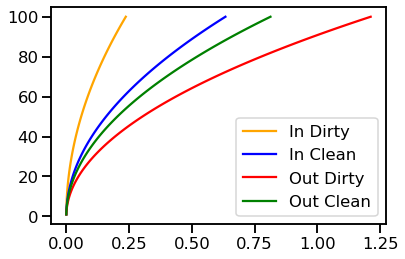

In [6]:
frontera_activos(400)

Sin embargo, las fronteras de decisión cambian si consideramos una proporción menor, $\frac{p}{n}=\frac{35}{140}=0.25$

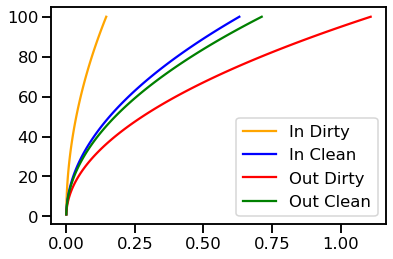

In [7]:
frontera_activos(140)

## Ejercicio 3

Resuelva las ecuaciones de Painlevé numéricamente para encontrar la distribución Tracy-Widom para $\beta = 1, 2$. Se recomienda seguir la sección 2.4 de "Random Matrix Theory and its Innovative Applications (A. Edelman, 2013)"

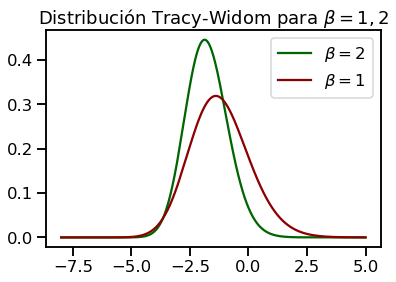

In [2]:
#Calculamos el F2
def vdp1(t, y):
    return np.array([y[1], t*y[0]+2*y[0]**3,y[3],y[0]**2])

t0, t1 = 5, -8      

t = np.linspace(t0, t1, 2600)  

y0 = [scipy.special.airy(t0)[0],scipy.special.airy(t0)[1],0,(scipy.special.airy(t0)[0])**2]  # initial value

y = np.zeros((len(t), len(y0)))   

y[0, :] = y0

r = integrate.ode(vdp1).set_integrator("dopri5")  

r.set_initial_value(y0, t0)   

for i in range(1, t.size):
  y[i, :] = r.integrate(t[i]) 
  
F2=np.exp(-y[:,2]) 
f2=np.gradient(F2,t)

#Ahora el F1

def vdp1(t, x):
    return np.array([x[1], t*x[0]+2*x[0]**3,-x[0],x[0]**2])

t0, t1 = 5, -8      

t = np.linspace(t0, t1, 2600)  

x0 = [scipy.special.airy(t0)[0],scipy.special.airy(t0)[1],0,0]  # initial value

x = np.zeros((len(t), len(x0)))   

x[0, :] = x0
r = integrate.ode(vdp1).set_integrator("dopri5")  

r.set_initial_value(x0, t0)   

for i in range(1, t.size):
  x[i, :] = r.integrate(t[i]) 
  
F1=np.sqrt(F2*np.exp(-x[:,2])) 
f1=np.gradient(F1,t)

sns.set_context("talk")

plt.plot(t, f2,"darkgreen",label=r'$\beta=2$')
plt.plot(t, f1,"darkred",label=r'$\beta=1$')
plt.title('Distribución Tracy-Widom para ' r'$\beta={1,2}$')
plt.legend()
plt.show()

## Ejercicio 4

Suponga una muestra de $n=10$ observaciones proviene de una población con distribución $N_{10}(0,\Sigma)$, y encontramos que el eigenvalor propio más grande de la muestra es $\hat{\lambda_{1}}=4.3$

1.- ¿Este valor es consistente con la hipótesis $H_{0} = W_{10}(10,I)$ aún y cuando el valor 4.3 cae fuera del soporte $[0,4]$ de la distribución de Marcenko-Pastur?

Si $\hat{\lambda_{1}}$ es el mayor eigenvalor muestral, entonces se tiene que 

$$\mathbb{P} \left(  \frac{n\hat{\lambda_{1}}-\mu_{n,p}}{\sigma_{n,p}} \leq s\right)\approx F_{1}(s) $$

donde: $$\mu_{n,p}= \left(\sqrt{n-\frac{1}{2}}+\sqrt{p-\frac{1}{2}} \right)^2$$
$$\sigma_{n,p}=\left(\sqrt{n-\frac{1}{2}}+\sqrt{p-\frac{1}{2}} \right)
\left(
\frac{1}{\sqrt{n-\frac{1}{2}} }+\frac{1}{\sqrt{p-\frac{1}{2}} }
\right)^{\frac{1}{3}}
$$

Por tanto, 
$$\mathbb{P}\left[ \hat{\lambda_{1}} > 4.3 \right] \approx 1- F_{1}
\left(  \frac{n*4.3-\mu_{n,p}}{\sigma_{n,p}}   \right)=0.059 $$

Entonces, no se puede rechazar la hipótesis nula con un nivel de significancia del 5%.

In [ ]:
#El siguiente es código en R
mu = (sqrt(9)+sqrt(10))^2

sigma = (sqrt(9)+sqrt(10))*(1/sqrt(9)+1/sqrt(10))^(1/3)

corte = (10*4.25-mu)/sigma

1-ptw(corte, beta=1, log = FALSE)
#0.0598519

2.- Utilizando la aproximación a segundo orden, calcule la probabilidad de encontrar un valor extremo mayor a 4.3

Los valores de $\mu_{n,p}$ y $\sigma_{n,p}$ con los que se calculó la probabilidad del inciso anterior son los mismos que los que se emplean en la aproximación de segundo orden, por tanto, la probabilidad es:

$$\mathbb{P}\left[ \hat{\lambda_{1}} > 4.3 \right] \approx 1- F_{1}
\left(  \frac{n*4.3-\mu_{n,p}}{\sigma_{n,p}}   \right)=0.059 $$

3.- Rechace o acepte la hipótesis nula $H_{0}$ bajo un nivel de significancia del 1%, 5% y del 10%

Dados los resultados del ejercicio 2, a un nivel de significancia del 5% y del 10% no se puede rechazar la hipótesis nula, pero se rechaza al 1%

4.- ¿Cuáles son sus conclusiones? 

Que dependiendo del nivel de significancia se podría o no aceptar 
